# **INTRODUCTION**


This project analyzes IMDb data to explore trends in movie ratings, uncover top-rated genres, and predict genres using machine learning models. By leveraging features like release year, IMDb votes, and region, it provides insights into audience preferences and the factors driving movie success. Perfect for film enthusiasts and data science practitioners, this project demonstrates the power of analytics in the entertainment industry.

# **1. IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# **2. LOADING THE DATASET**

In [2]:
data_path = "/kaggle/input/amazon-prime-dataset/data.csv"
df = pd.read_csv(data_path)

# **3. DATA CLEANING**

In [3]:
# Remove records with any missing values and create a copy to avoid chained assignment warnings
df_cleaned = df.dropna().copy()

# Round `imdbAverageRating` to the nearest integer
if 'imdbAverageRating' in df_cleaned.columns:
    df_cleaned['imdbAverageRating'] = df_cleaned['imdbAverageRating'].round()

## 3.1 DEFINING REGION MAPPING
CATEGORIZING COUNTRIES INTO REGIONS

In [4]:
region_mapping = {
    # North America
    'USA': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',

    # Central America
    'Guatemala': 'Central America',
    'Belize': 'Central America',
    'Honduras': 'Central America',
    'El Salvador': 'Central America',
    'Nicaragua': 'Central America',
    'Costa Rica': 'Central America',
    'Panama': 'Central America',

    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Colombia': 'South America',
    'Chile': 'South America',
    'Peru': 'South America',
    'Venezuela': 'South America',
    'Uruguay': 'South America',
    'Paraguay': 'South America',
    'Ecuador': 'South America',
    'Bolivia': 'South America',
    'Suriname': 'South America',
    'Guyana': 'South America',

    # Europe
    'UK': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Poland': 'Europe',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'Norway': 'Europe',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Belgium': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Switzerland': 'Europe',
    'Portugal': 'Europe',
    'Greece': 'Europe',
    'Czech Republic': 'Europe',
    'Hungary': 'Europe',
    'Romania': 'Europe',
    'Bulgaria': 'Europe',

    # Asia
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'North Korea': 'Asia',
    'Indonesia': 'Asia',
    'Pakistan': 'Asia',
    'Bangladesh': 'Asia',
    'Vietnam': 'Asia',
    'Philippines': 'Asia',
    'Malaysia': 'Asia',
    'Thailand': 'Asia',
    'Sri Lanka': 'Asia',
    'Singapore': 'Asia',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Fiji': 'Oceania',
    'Papua New Guinea': 'Oceania',

    # Middle East
    'Saudi Arabia': 'Middle East',
    'Iran': 'Middle East',
    'Iraq': 'Middle East',
    'Israel': 'Middle East',
    'Turkey': 'Middle East',
    'Syria': 'Middle East',
    'Jordan': 'Middle East',
    'Lebanon': 'Middle East',
    'UAE': 'Middle East',
    'Qatar': 'Middle East',

    # Africa
    'South Africa': 'Africa',
    'Egypt': 'Africa',
    'Nigeria': 'Africa',
    'Kenya': 'Africa',
    'Ethiopia': 'Africa',
    'Ghana': 'Africa',
    'Morocco': 'Africa',
    'Algeria': 'Africa',
    'Tunisia': 'Africa',
    'Uganda': 'Africa',

    # Default for uncategorized countries
    'Other': 'Other',
}

In [5]:
def categorize_regions(country_list):
    regions = set()
    for country in str(country_list).split(', '):
        if country in region_mapping:
            regions.add(region_mapping[country])
        else:
            regions.add('Other')  # Default region for uncategorized countries
    return ', '.join(regions)

# Apply region categorization
if 'availableCountries' in df_cleaned.columns:
    df_cleaned['Region'] = df_cleaned['availableCountries'].apply(categorize_regions)

# Drop the `availableCountries` column
if 'availableCountries' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['availableCountries'])

# Convert `releaseYear` to integer type
if 'releaseYear' in df_cleaned.columns:
    df_cleaned['releaseYear'] = df_cleaned['releaseYear'].astype(int)

## 3.2 SAVING THE CLEANED DATASET

In [6]:
df_cleaned.to_csv("cleaned_data.csv", index=False)

## 3.3 PRINTING THE DATASET

In [7]:
# Display the first few rows of the cleaned dataset & basic information
print("Cleaned Dataset Preview:")
# Display basic dataset information
print(df_cleaned.info())

# Preview the first few rows of the dataset
print(df_cleaned.head())
df_cleaned.tail()

Cleaned Dataset Preview:
<class 'pandas.core.frame.DataFrame'>
Index: 8718 entries, 2 to 12149
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8718 non-null   object 
 1   type               8718 non-null   object 
 2   genres             8718 non-null   object 
 3   releaseYear        8718 non-null   int64  
 4   imdbId             8718 non-null   object 
 5   imdbAverageRating  8718 non-null   float64
 6   imdbNumVotes       8718 non-null   float64
 7   Region             8718 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 613.0+ KB
None
                              title type                         genres  \
2                Con Men Case Files   tv                          Crime   
3  Tengo que morir todas las noches   tv                          Drama   
4                  Kids on the Edge   tv                    Documentary   
7  LOL: Last One Laughin

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,Region
12142,Sundar Bou,movie,Drama,2021,tt14825960,6.0,5.0,Other
12146,Una via fredda per l'inferno,movie,Thriller,2021,tt33504984,6.0,34.0,Other
12147,The Initiated: Written from the Shadows,movie,Drama,2021,tt31187064,6.0,95.0,Other
12148,Anunnakiler,movie,"Action, Comedy, Sci-Fi",2021,tt33504617,3.0,323.0,Other
12149,The Black Nun,movie,Horror,2021,tt21616292,3.0,44.0,Other


# **4. EDA**

## 4.1 NUMBER OF MOVIES RELEASED PER YEAR

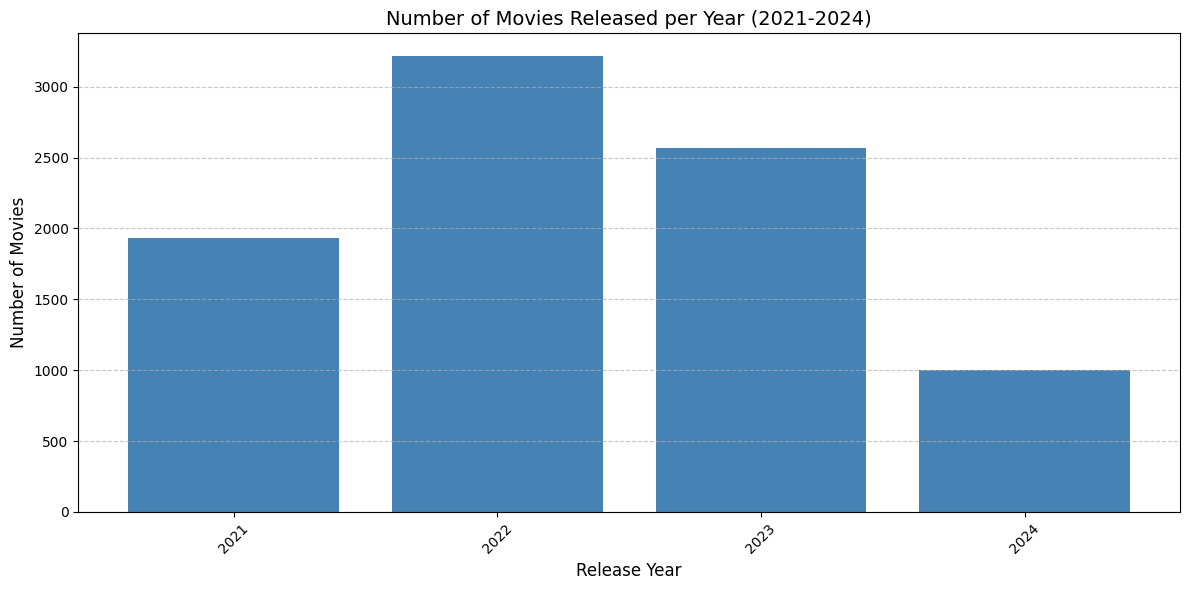

In [8]:
if 'releaseYear' in df_cleaned.columns:
    # Filter data for years 2021-2024
    release_year_counts = df_cleaned['releaseYear'].value_counts().sort_index()
    release_year_counts = release_year_counts[(release_year_counts.index >= 2021) & (release_year_counts.index <= 2024)]

    # Plot the number of movies released per year
    plt.figure(figsize=(12, 6))
    plt.bar(release_year_counts.index, release_year_counts.values, color='steelblue')
    plt.title("Number of Movies Released per Year (2021-2024)", fontsize=14)
    plt.xlabel("Release Year", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(ticks=release_year_counts.index, labels=release_year_counts.index, rotation=45)  # Ensure integer ticks
    plt.tight_layout()
    plt.show()

## 4.2 TREND OF DRAMA MOVIES RELEASED PER YEAR

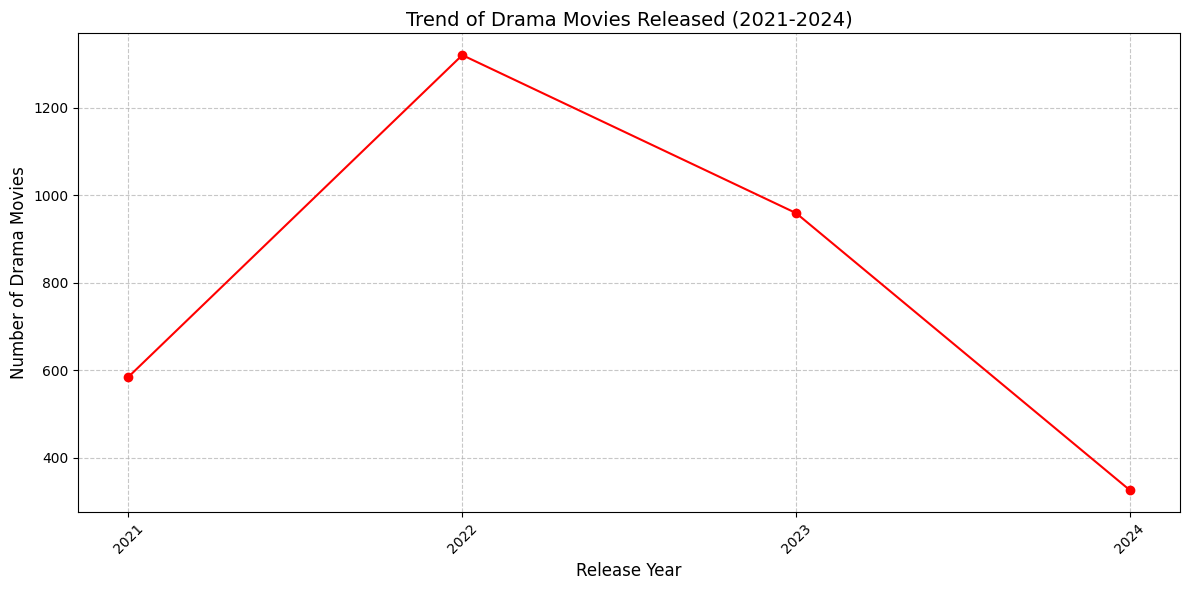

In [9]:

if 'releaseYear' in df_cleaned.columns and 'genres' in df_cleaned.columns:
    # Filter data for Action movies
    action_movies = df_cleaned[df_cleaned['genres'].str.contains("Drama", na=False)]

    # Group by release year and count the number of Action movies
    action_release_year_counts = action_movies['releaseYear'].value_counts().sort_index()

    # Filter years between 2000 and 2024
    action_release_year_counts = action_release_year_counts[
        (action_release_year_counts.index >= 2021) & (action_release_year_counts.index <= 2024)
    ]

    # Plot the trend of Action movies released per year
    plt.figure(figsize=(12, 6))
    plt.plot(action_release_year_counts.index, action_release_year_counts.values, marker='o', color='red', linestyle='-')
    plt.title("Trend of Drama Movies Released (2021-2024)", fontsize=14)
    plt.xlabel("Release Year", fontsize=12)
    plt.ylabel("Number of Drama Movies", fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.xticks(ticks=action_release_year_counts.index, labels=action_release_year_counts.index, rotation=45)
    plt.tight_layout()
    plt.show()

## 4.3 TREND OF COMEDY MOVIES RELEASED PER YEAR

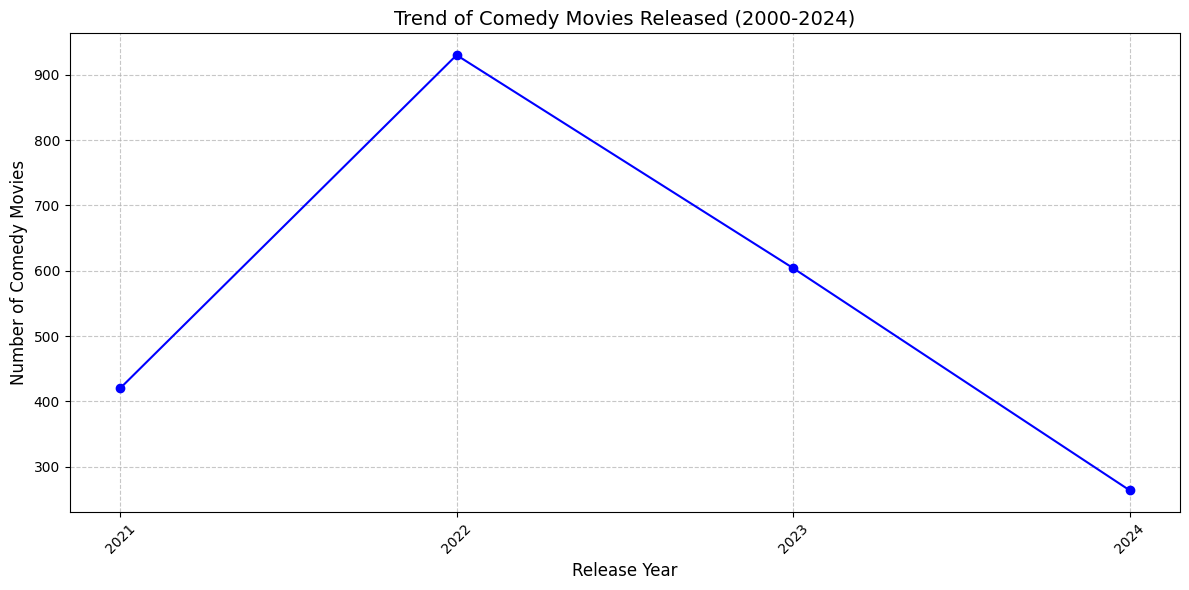

In [10]:
if 'releaseYear' in df_cleaned.columns and 'genres' in df_cleaned.columns:
    # Filter data for Comedy movies
    comedy_movies = df_cleaned[df_cleaned['genres'].str.contains("Comedy", na=False)]

    # Group by release year and count the number of Comedy movies
    comedy_release_year_counts = comedy_movies['releaseYear'].value_counts().sort_index()

    # Filter years between 2021 and 2024
    comedy_release_year_counts = comedy_release_year_counts[
        (comedy_release_year_counts.index >= 2021) & (comedy_release_year_counts.index <= 2024)
    ]

    # Plot the trend of Comedy movies released per year
    plt.figure(figsize=(12, 6))
    plt.plot(comedy_release_year_counts.index, comedy_release_year_counts.values, marker='o', color='blue', linestyle='-')
    plt.title("Trend of Comedy Movies Released (2000-2024)", fontsize=14)
    plt.xlabel("Release Year", fontsize=12)
    plt.ylabel("Number of Comedy Movies", fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.xticks(ticks=comedy_release_year_counts.index, labels=comedy_release_year_counts.index, rotation=45)
    plt.tight_layout()
    plt.show()

## 4.4 NUMBER OF MOVIES RELEASED BY GENRE (2021-2024)

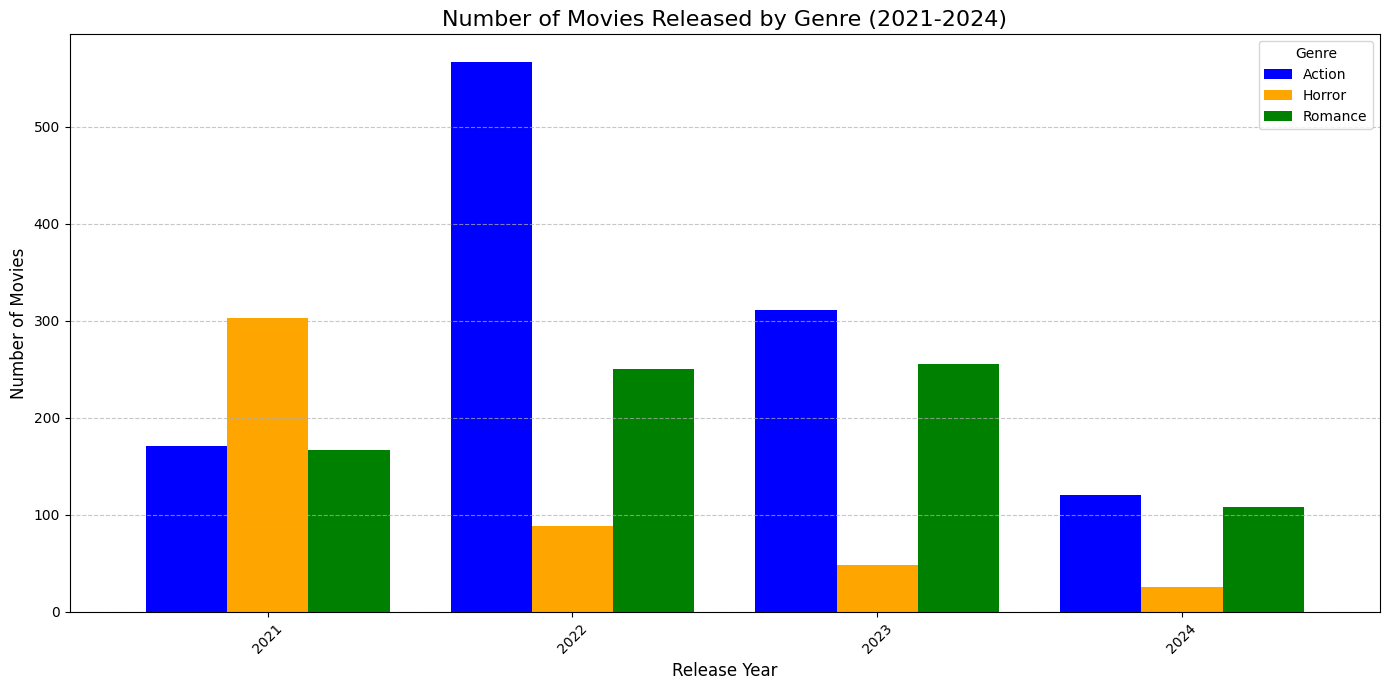

In [11]:
if 'releaseYear' in df_cleaned.columns and 'genres' in df_cleaned.columns:
    # Define genres to compare
    genres_to_compare = ["Action", "Horror", "Romance"]

    # Initialize a dictionary to hold counts for each genre
    genre_counts = {}

    for genre in genres_to_compare:
        # Filter data for the specific genre
        genre_movies = df_cleaned[df_cleaned['genres'].str.contains(genre, na=False)]
        
        # Group by release year and count the movies
        release_year_counts = genre_movies['releaseYear'].value_counts().sort_index()
        
        # Filter for years 2000-2024
        release_year_counts = release_year_counts[
            (release_year_counts.index >= 2021) & (release_year_counts.index <= 2024)
        ]
        
        # Add to dictionary
        genre_counts[genre] = release_year_counts

    # Create a DataFrame from the dictionary
    genre_trends_df = pd.DataFrame(genre_counts).fillna(0).astype(int)

    # Plot the grouped bar chart
    genre_trends_df.plot(
        kind='bar',
        figsize=(14, 7),
        width=0.8,
        color=['blue', 'orange', 'green'],  # Colors for each genre
    )
    plt.title("Number of Movies Released by Genre (2021-2024)", fontsize=16)
    plt.xlabel("Release Year", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(ticks=range(len(genre_trends_df.index)), labels=genre_trends_df.index, rotation=45)
    plt.legend(title="Genre")
    plt.tight_layout()
    plt.show()

## 4.5 TOP 5 GENRES PER YEAR (2021-2024)

/tmp/ipykernel_17/787150000.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, columns='count'))


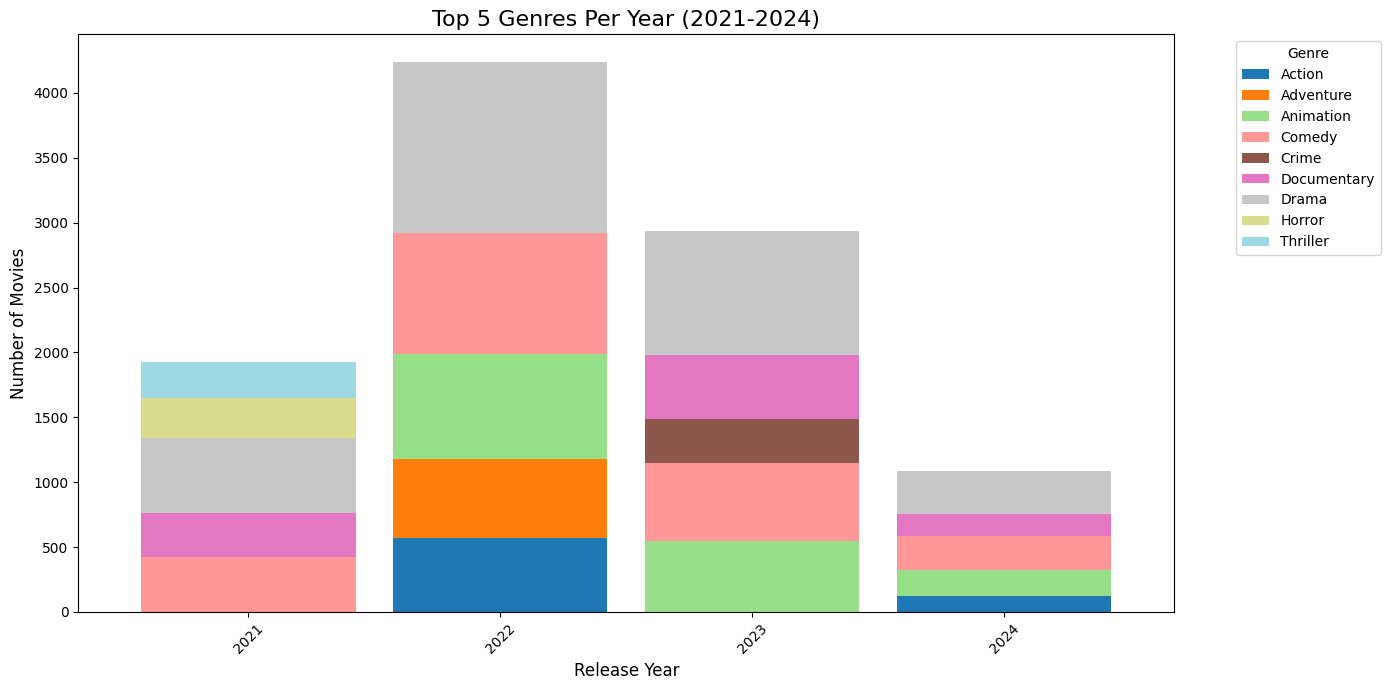

In [12]:
if 'releaseYear' in df_cleaned.columns and 'genres' in df_cleaned.columns:
    # Explode the 'genres' column to handle multiple genres in one movie
    df_cleaned['genres_exploded'] = df_cleaned['genres'].str.split(', ')
    exploded_genres = df_cleaned.explode('genres_exploded')

    # Filter for years 2021-2024
    exploded_genres = exploded_genres[
        (exploded_genres['releaseYear'] >= 2021) & (exploded_genres['releaseYear'] <= 2024)
    ]

    # Count the number of movies per genre per year
    genre_counts_per_year = (
        exploded_genres.groupby(['releaseYear', 'genres_exploded'])
        .size()
        .reset_index(name='count')
    )

    # Find the top 5 genres for each year (use `include_groups=False` to suppress warning)
    top_genres_per_year = (
        genre_counts_per_year.groupby('releaseYear', group_keys=False)
        .apply(lambda x: x.nlargest(5, columns='count'))
    )

    # Pivot the data for a stacked bar chart
    top_genres_pivot = top_genres_per_year.pivot(
        index='releaseYear', columns='genres_exploded', values='count'
    ).fillna(0)

    # Plot the stacked bar chart
    top_genres_pivot.plot(
        kind='bar',
        stacked=True,
        figsize=(14, 7),
        colormap='tab20',
        width=0.85,
    )
    plt.title("Top 5 Genres Per Year (2021-2024)", fontsize=16)
    plt.xlabel("Release Year", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 4.6 TOP 5 GENRES OVERALL

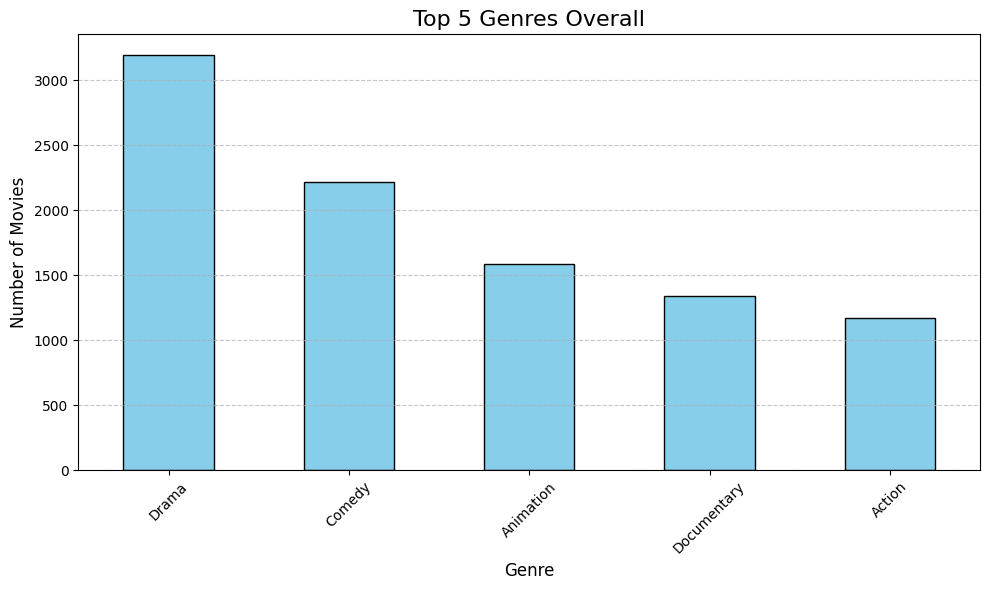

In [13]:
if 'genres' in df_cleaned.columns:
    # Explode the 'genres' column to handle multiple genres in one movie
    df_cleaned['genres_exploded'] = df_cleaned['genres'].str.split(', ')
    exploded_genres = df_cleaned.explode('genres_exploded')

    # Count the occurrences of each genre
    genre_counts = exploded_genres['genres_exploded'].value_counts()

    # Get the top 5 genres
    top_5_genres = genre_counts.nlargest(5)

    # Plot the bar chart for the top 5 genres
    plt.figure(figsize=(10, 6))
    top_5_genres.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Top 5 Genres Overall", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 4.7 DISTRIBUTION OF IMDb RATINGS

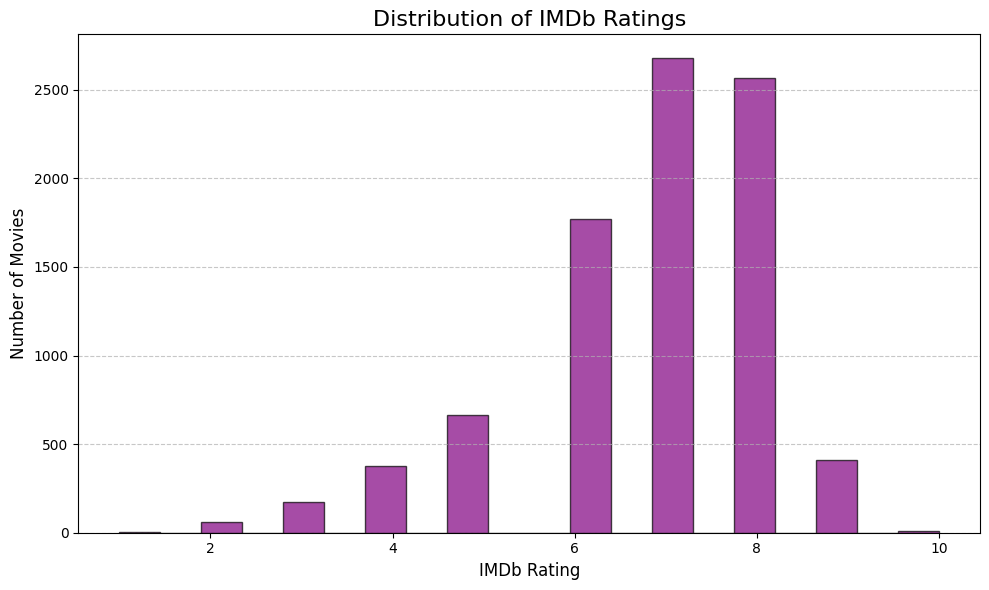

In [14]:
if 'imdbAverageRating' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df_cleaned['imdbAverageRating'].dropna(), bins=20, color='purple', edgecolor='black', alpha=0.7)
    plt.title("Distribution of IMDb Ratings", fontsize=16)
    plt.xlabel("IMDb Rating", fontsize=12)
    plt.ylabel("Number of Movies", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 4.8 MOVIES BY TYPE (PIE CHART)

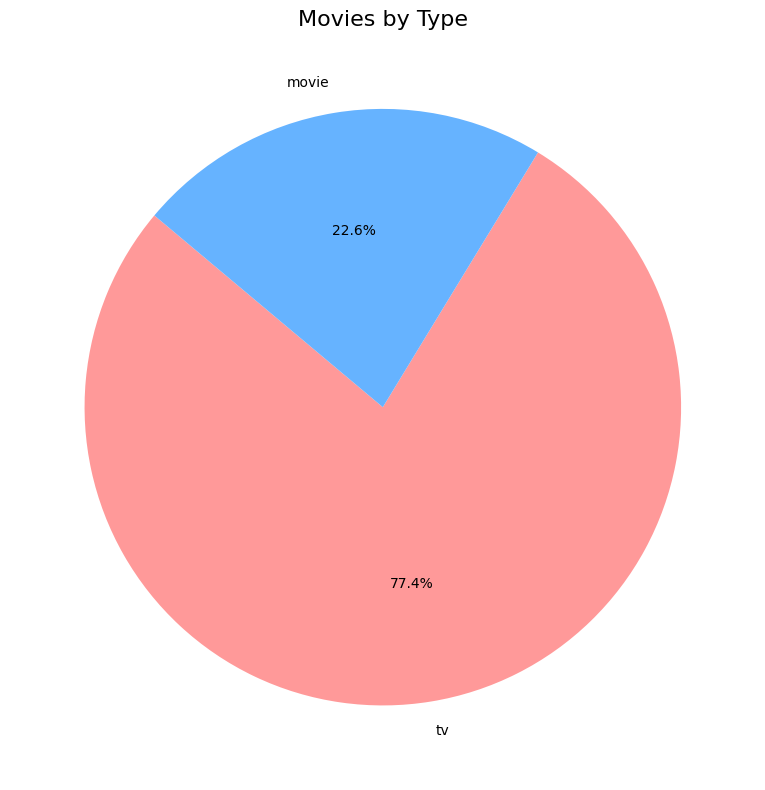

In [15]:
if 'type' in df_cleaned.columns:
    type_counts = df_cleaned['type'].value_counts()

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title("Movies by Type", fontsize=16)
    plt.ylabel("")  # Remove y-axis label
    plt.tight_layout()
    plt.show()

## 4.9 IMDb RATINGS ACROSS GENRES

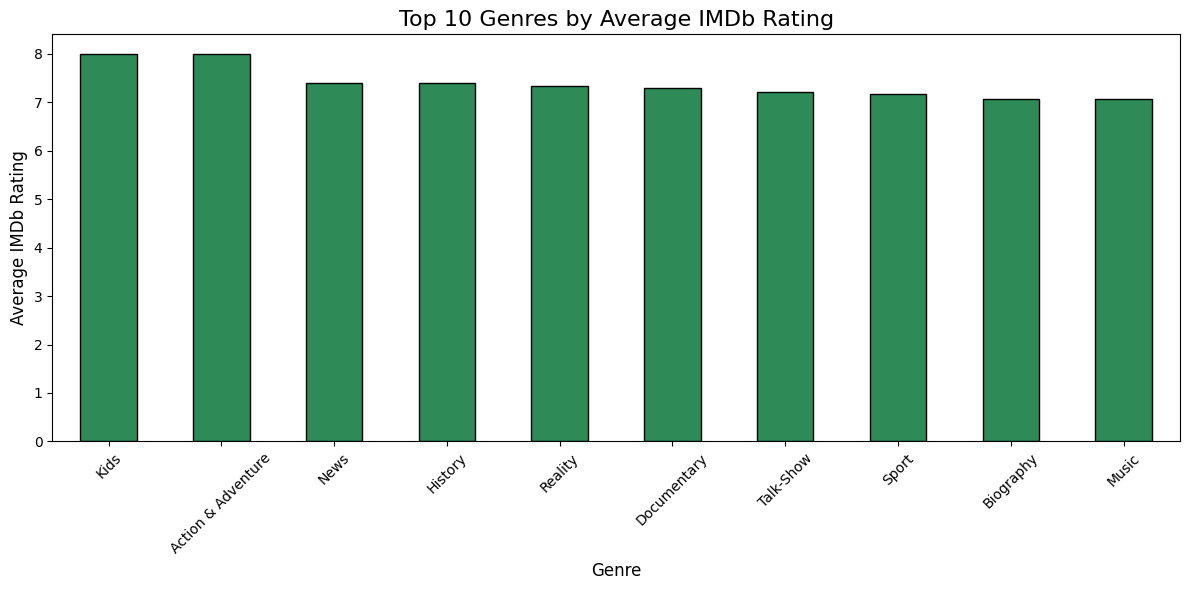

In [16]:
if 'genres' in df_cleaned.columns and 'imdbAverageRating' in df_cleaned.columns:
    # Explode genres
    df_cleaned['genres_exploded'] = df_cleaned['genres'].str.split(', ')
    exploded_genres = df_cleaned.explode('genres_exploded')

    # Calculate average rating by genre
    avg_ratings = exploded_genres.groupby('genres_exploded')['imdbAverageRating'].mean().sort_values(ascending=False).nlargest(10)

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    avg_ratings.plot(kind='bar', color='seagreen', edgecolor='black')
    plt.title("Top 10 Genres by Average IMDb Rating", fontsize=16)
    plt.xlabel("Genre", fontsize=12)
    plt.ylabel("Average IMDb Rating", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# **5. MODELING**

## 5.1 PREPROCESSING AND FEATURE ENGINEERING

In [17]:
if 'genres' in df_cleaned.columns:
    # Let's predict if a movie belongs to a specific genre (e.g., 'Action')
    df_cleaned['is_action'] = df_cleaned['genres'].apply(lambda x: 1 if 'Action' in x else 0)

    # Features: releaseYear, imdbNumVotes, and Region
    X = df_cleaned[['releaseYear', 'imdbNumVotes', 'Region']]
    y = df_cleaned['is_action']

    # One-hot encode categorical columns (Region)
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## 5.2 TRAINING AND EVALUATING MODELS

In [18]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy for classification models
    accuracy = accuracy_score(y_test, y_pred)
    
    # For classification models: calculate MAE, MSE, RMSE, R^2, Variance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    variance = np.var(y_test - y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Variance: {variance:.2f}")
    print("-" * 60)

Model: Random Forest
Accuracy: 79.70%
Mean Absolute Error (MAE): 0.20
Mean Squared Error (MSE): 0.20
Root Mean Squared Error (RMSE): 0.45
Variance: 0.20
------------------------------------------------------------
Model: Logistic Regression
Accuracy: 86.07%
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.37
Variance: 0.12
------------------------------------------------------------
